# Теория вероятностей и математическая статистика
## Урок 9. Регрессионный анализ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1**  
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) # x
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) # y

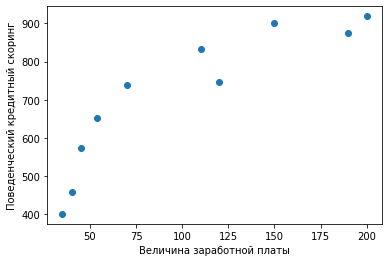

In [3]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

На графике видна взаимосвязь между признаком и целевой переменной.

In [4]:
if len(zp) == len(ks):
    n = len(zp)
else:
    print("Error")

**Коэффициенты линейной регрессии (с интерсептом)**

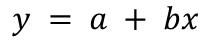

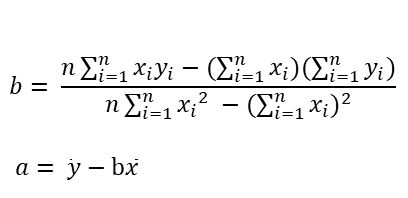

In [5]:
b = round((n * np.sum(zp * ks) - np.sum(zp) * np.sum(ks)) / (n * np.sum(zp**2) - (np.sum(zp)**2)), 2)
b

2.62

In [6]:
a = round(np.mean(ks) - b * np.mean(zp), 2)
a

444.23

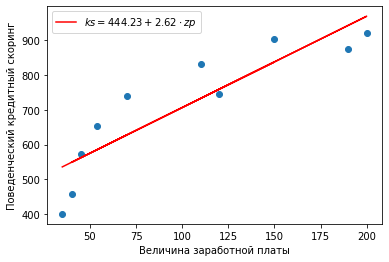

In [7]:
plt.scatter(zp,ks)
plt.plot(zp, a+b*zp, c='r', label=r'$ks=444.23+2.62\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

**Коэффициент линейной регрессии (без интерсепта)**  
Будем использовать матричный метод расчета коэффициентов линейной регрессии

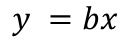

In [8]:
ks=ks.reshape((-1,1))
zp=zp.reshape((-1,1))
print(ks, "\n\n", zp)

[[401]
 [574]
 [874]
 [919]
 [459]
 [739]
 [653]
 [902]
 [746]
 [832]] 

 [[ 35]
 [ 45]
 [190]
 [200]
 [ 40]
 [ 70]
 [ 54]
 [150]
 [120]
 [110]]


In [10]:
B = np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
B

array([[5.88982042]])

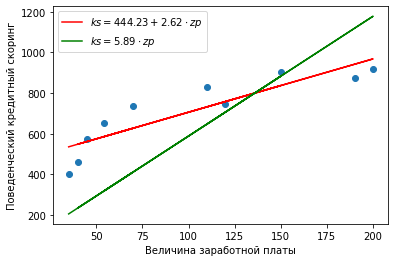

In [11]:
plt.scatter(zp,ks)
plt.plot(zp, a+b*zp, c='r', label=r'$ks=444.23+2.62\cdot zp$')
plt.plot(zp, B*zp, c='g', label=r'$ks=5.89\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

**Задача 2**  
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

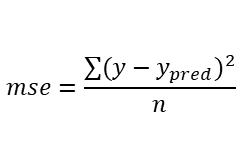

In [12]:
# Функция потерь
def mse_(b, x, y):
    return (np.sum((b * x - y)**2))/len(x)

In [13]:
# при b = 2.62
mse_(2.62, zp, ks)

203812.48504

In [14]:
# Частная производная функции потерь
def _mse_p(b,x,y):
    return (2/len(x))*np.sum((b*x-y)*x)

In [15]:
alpha=1e-06

In [19]:
b=0.1
mse_min=mse_(b,zp,ks)
i_min=1
b_min=b
for i in range(10000):
    b-=alpha*_mse_p(b,zp,ks)
    if i%100==0:
        print(f'Итерация #{i}, b={b}, mse={mse_(b, zp,ks)}')
    if mse_(b,zp,ks)>mse_min:
        print(f'Итерация #{i_min}, b={b_min}, mse={mse_min},\nДостигнут минимум.')
        break
    else:
        mse_min=mse_(b,zp,ks)
        i_min=i
        b_min=b

Итерация #0, b=0.25952808000000005, mse=493237.7212546963
Итерация #100, b=5.54537842245223, mse=58151.31823171113
Итерация #200, b=5.868748638669329, mse=56522.97550129376
Итерация #300, b=5.888531320728348, mse=56516.88130936019
Итерация #400, b=5.8897415574471985, mse=56516.85850140053
Итерация #500, b=5.889815595583751, mse=56516.858416040064
Итерация #600, b=5.889820124983314, mse=56516.85841572062
Итерация #628, b=5.889820285147628, mse=56516.85841571966,
Достигнут минимум.


---------------
**Ответ:**  
b_min = 5.89

--------------------

**Задача 3**  
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [20]:
# Функция потерь
def _mse_ab(a,b, x, y):
    return np.sum(((a+b*x)-y)**2)/len(x)

In [21]:
# Частная производная функции потерь по a:
def _mse_pa(a,b,x,y): 
    return 2*np.sum((a+b*x)-y)/len(x)

In [22]:
# Частная производная функции потерь по b:
def _mse_pb(a,b,x,y):
    return 2*np.sum(((a+b*x)-y)*x)/len(x)

In [23]:
alpha=5e-05

In [24]:
b=0.1
a=0.1
mseab_min=_mse_ab(a,b,zp,ks)
i_min=1
b_min=b
a_min=a
   
for i in range(1000000):
    a-=alpha*_mse_pa(a,b,zp,ks)
    b-=alpha*_mse_pb(a,b,zp,ks)
    if i%50000==0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={_mse_ab(a, b, zp,ks)}')
    if _mse_ab(a, b,zp,ks)>mseab_min:
        print(f'Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min=_mse_ab(a, b,zp,ks)
        i_min=i
        b_min=b
        a_min=a
print(f'a={a_min}\nb={b_min}')

Итерация #0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Итерация #50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Итерация #100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Итерация #150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Итерация #200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Итерация #250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Итерация #300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Итерация #350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Итерация #400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Итерация #450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Итерация #500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Итерация #520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592,
Достигнут минимум.
a=444

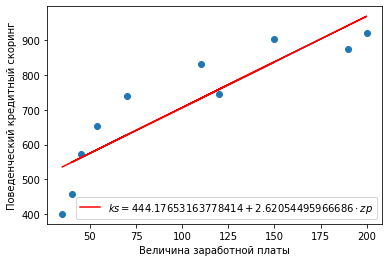

In [25]:
plt.scatter(zp,ks)
plt.plot(zp,a_min+b_min*zp, c='r', label=r'$ks=444.17653163778414+2.62054495966686\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()